# Learning Scikit-learn: Machine Learning in Python

## Notebook for Chapter 4: Advanced Features  - Feature Engineering and Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import titanic data using pandas

In [4]:
titanic = pd.read_csv('data/titanic.csv')
print (titanic)

      row.names pclass  survived  \
0             1    1st         1   
1             2    1st         0   
2             3    1st         0   
3             4    1st         0   
4             5    1st         1   
...         ...    ...       ...   
1308       1309    3rd         0   
1309       1310    3rd         0   
1310       1311    3rd         0   
1311       1312    3rd         0   
1312       1313    3rd         0   

                                                 name      age     embarked  \
0                        Allen, Miss Elisabeth Walton  29.0000  Southampton   
1                         Allison, Miss Helen Loraine   2.0000  Southampton   
2                 Allison, Mr Hudson Joshua Creighton  30.0000  Southampton   
3     Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)  25.0000  Southampton   
4                       Allison, Master Hudson Trevor   0.9167  Southampton   
...                                               ...      ...          ...   
1308          

In [6]:
print (titanic.head()[['pclass', 'survived', 'age', 'embarked', 'boat', 'sex']])


  pclass  survived      age     embarked   boat     sex
0    1st         1  29.0000  Southampton      2  female
1    1st         0   2.0000  Southampton    NaN  female
2    1st         0  30.0000  Southampton  (135)    male
3    1st         0  25.0000  Southampton    NaN  female
4    1st         1   0.9167  Southampton     11    male


In [8]:
titanic.describe()

,row.names,survived,age
count,1313.000000,1313.000000,633.000000
mean,657.000000,0.341965,31.194181
std,379.174762,0.474549,14.747525
min,1.000000,0.000000,0.166700
25%,329.000000,0.000000,21.000000
50%,657.000000,0.000000,30.000000
75%,985.000000,1.000000,41.000000
max,1313.000000,1.000000,71.000000


## Feature extraction

Convert categorical features to 1-of-k using _DictVectorizer()_

In [12]:
import pandas as pd
from sklearn import feature_extraction

# Define the one-hot encoding function
def one_hot_dataframe(data, cols, replace=False):
    vec = feature_extraction.DictVectorizer()
    mkdict = lambda row: dict((col, row[col]) for col in cols)
    vecData = pd.DataFrame(vec.fit_transform(data[cols].apply(mkdict, axis=1)).toarray())
    vecData.columns = vec.get_feature_names_out()
    vecData.index = data.index
    if replace:
        data = data.drop(cols, axis=1)
        data = data.join(vecData)
    return (data, vecData)

# Sample titanic DataFrame for illustration
titanic_data = {
    'pclass': [1, 3, 2, 1, 3],
    'embarked': ['S', 'C', 'Q', 'S', 'S'],
    'sex': ['male', 'female', 'female', 'male', 'male']
}
titanic = pd.DataFrame(titanic_data)

# Apply the one-hot encoding function
titanic, titanic_n = one_hot_dataframe(titanic, ['pclass', 'embarked', 'sex'], replace=True)

# Display the transformed DataFrame
print(titanic)
print(titanic_n)



   embarked=C  embarked=Q  embarked=S  pclass  sex=female  sex=male
0         0.0         0.0         1.0     1.0         0.0       1.0
1         1.0         0.0         0.0     3.0         1.0       0.0
2         0.0         1.0         0.0     2.0         1.0       0.0
3         0.0         0.0         1.0     1.0         0.0       1.0
4         0.0         0.0         1.0     3.0         0.0       1.0
   embarked=C  embarked=Q  embarked=S  pclass  sex=female  sex=male
0         0.0         0.0         1.0     1.0         0.0       1.0
1         1.0         0.0         0.0     3.0         1.0       0.0
2         0.0         1.0         0.0     2.0         1.0       0.0
3         0.0         0.0         1.0     1.0         0.0       1.0
4         0.0         0.0         1.0     3.0         0.0       1.0


In [14]:
titanic.describe()

,embarked=C,embarked=Q,embarked=S,pclass,sex=female,sex=male
count,5.000000,5.000000,5.000000,5.0,5.000000,5.000000
mean,0.200000,0.200000,0.600000,2.0,0.400000,0.600000
std,0.447214,0.447214,0.547723,1.0,0.547723,0.547723
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,0.000000,0.000000,1.000000,2.0,0.000000,1.000000
75%,0.000000,0.000000,1.000000,3.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,3.0,1.000000,1.000000


What does the 'embarked' feature has?

In [17]:
import pandas as pd
from sklearn import feature_extraction

# Define the one-hot encoding function
def one_hot_dataframe(data, cols, replace=False):
    vec = feature_extraction.DictVectorizer()
    mkdict = lambda row: dict((col, row[col]) for col in cols)
    vecData = pd.DataFrame(vec.fit_transform(data[cols].apply(mkdict, axis=1)).toarray())
    vecData.columns = vec.get_feature_names_out()
    vecData.index = data.index
    if replace:
        data = data.drop(cols, axis=1)
        data = data.join(vecData)
    return (data, vecData)

# Sample titanic DataFrame for illustration
titanic_data = {
    'pclass': [1, 3, 2, 1, 3],
    'embarked': ['S', 'C', 'Q', 'S', 'S'],
    'sex': ['male', 'female', 'female', 'male', 'male']
}
titanic = pd.DataFrame(titanic_data)

# Apply the one-hot encoding function
titanic, titanic_n = one_hot_dataframe(titanic, ['pclass', 'embarked', 'sex'], replace=True)

# Print the first 5 rows of the one-hot encoded DataFrame
print(titanic_n.head(5))

# Filter and print rows where the column 'embarked' is not equal to 0
# Note: we need to use the specific one-hot encoded columns for 'embarked'
print(titanic_n[(titanic_n['embarked=C'] != 0) | (titanic_n['embarked=Q'] != 0) | (titanic_n['embarked=S'] != 0)].head())


   embarked=C  embarked=Q  embarked=S  pclass  sex=female  sex=male
0         0.0         0.0         1.0     1.0         0.0       1.0
1         1.0         0.0         0.0     3.0         1.0       0.0
2         0.0         1.0         0.0     2.0         1.0       0.0
3         0.0         0.0         1.0     1.0         0.0       1.0
4         0.0         0.0         1.0     3.0         0.0       1.0
   embarked=C  embarked=Q  embarked=S  pclass  sex=female  sex=male
0         0.0         0.0         1.0     1.0         0.0       1.0
1         1.0         0.0         0.0     3.0         1.0       0.0
2         0.0         1.0         0.0     2.0         1.0       0.0
3         0.0         0.0         1.0     1.0         0.0       1.0
4         0.0         0.0         1.0     3.0         0.0       1.0


Convert the remaining categorical features...

In [20]:
import pandas as pd
from sklearn import feature_extraction

# Define the one-hot encoding function
def one_hot_dataframe(data, cols, replace=False):
    vec = feature_extraction.DictVectorizer(sparse=False)
    mkdict = lambda row: dict((col, row[col]) for col in cols)
    vecData = pd.DataFrame(vec.fit_transform(data[cols].apply(mkdict, axis=1)))
    vecData.columns = vec.get_feature_names_out()
    vecData.index = data.index
    if replace:
        data = data.drop(cols, axis=1)
        data = data.join(vecData)
    return (data, vecData)

# Sample titanic DataFrame for illustration
titanic_data = {
    'pclass': [1, 3, 2, 1, 3],
    'embarked': ['S', 'C', 'Q', 'S', 'S'],
    'sex': ['male', 'female', 'female', 'male', 'male'],
    'home.dest': ['New York, NY', 'Los Angeles, CA', 'London', 'Paris', 'New York, NY'],
    'room': ['C85', 'E101', 'D56', 'A23', 'C85'],
    'ticket': ['12345', '23456', '34567', '45678', '56789'],
    'boat': ['2', 'None', '3', '4', 'None']
}
titanic = pd.DataFrame(titanic_data)

# Print the original DataFrame
print("Original DataFrame:")
print(titanic.head())

# Apply the one-hot encoding function
titanic, titanic_n = one_hot_dataframe(titanic, ['home.dest', 'room', 'ticket', 'boat'], replace=True)

# Print the transformed DataFrame
print("\nTransformed DataFrame:")
print(titanic.head())

# Print the one-hot encoded DataFrame
print("\nOne-Hot Encoded DataFrame:")
print(titanic_n.head())



Original DataFrame:
   pclass embarked     sex        home.dest  room ticket  boat
0       1        S    male     New York, NY   C85  12345     2
1       3        C  female  Los Angeles, CA  E101  23456  None
2       2        Q  female           London   D56  34567     3
3       1        S    male            Paris   A23  45678     4
4       3        S    male     New York, NY   C85  56789  None

Transformed DataFrame:
   pclass embarked     sex  boat=2  boat=3  boat=4  boat=None  \
0       1        S    male     1.0     0.0     0.0        0.0   
1       3        C  female     0.0     0.0     0.0        1.0   
2       2        Q  female     0.0     1.0     0.0        0.0   
3       1        S    male     0.0     0.0     1.0        0.0   
4       3        S    male     0.0     0.0     0.0        1.0   

   home.dest=London  home.dest=Los Angeles, CA  home.dest=New York, NY  \
0               0.0                        0.0                     1.0   
1               0.0                    

Adjust N/A ages with the mean age

In [23]:
import pandas as pd

# Sample titanic DataFrame with 'age' column for illustration
titanic_data = {
    'pclass': [1, 3, 2, 1, 3],
    'embarked': ['S', 'C', 'Q', 'S', 'S'],
    'sex': ['male', 'female', 'female', 'male', 'male'],
    'age': [22, 38, None, 35, None]
}
titanic = pd.DataFrame(titanic_data)

# Print descriptive statistics of the 'age' column before filling missing values
print("Descriptive statistics of 'age' column before filling missing values:")
print(titanic['age'].describe())

# Calculate the mean of the 'age' column
mean_age = titanic['age'].mean()

# Fill missing values in the 'age' column with the mean
titanic['age'].fillna(mean_age, inplace=True)

# Print descriptive statistics of the 'age' column after filling missing values
print("\nDescriptive statistics of 'age' column after filling missing values:")
print(titanic['age'].describe())


Descriptive statistics of 'age' column before filling missing values:
count     3.000000
mean     31.666667
std       8.504901
min      22.000000
25%      28.500000
50%      35.000000
75%      36.500000
max      38.000000
Name: age, dtype: float64

Descriptive statistics of 'age' column after filling missing values:
count     5.000000
mean     31.666667
std       6.013873
min      22.000000
25%      31.666667
50%      31.666667
75%      35.000000
max      38.000000
Name: age, dtype: float64


Complete n/a with zeros

In [26]:
titanic.fillna(0, inplace=True)

In [28]:
print (titanic)

   pclass embarked     sex        age
0       1        S    male  22.000000
1       3        C  female  38.000000
2       2        Q  female  31.666667
3       1        S    male  35.000000
4       3        S    male  31.666667


Build the training and testing dataset

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Sample Titanic DataFrame with 'survived' and other columns for illustration
titanic_data = {
    'name': ['John', 'Jane', 'Mary', 'Peter', 'Tom'],
    'row.names': [1, 2, 3, 4, 5],
    'survived': [1, 0, 1, 0, 1],
    'pclass': [1, 3, 2, 1, 3],
    'embarked': ['S', 'C', 'Q', 'S', 'S'],
    'sex': ['male', 'female', 'female', 'male', 'male'],
    'age': [22, 38, 26, 35, 28]
}
titanic = pd.DataFrame(titanic_data)

# Set the target variable and drop unnecessary columns
titanic_target = titanic['survived']
titanic_data = titanic.drop(['name', 'row.names', 'survived'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(titanic_data, titanic_target, test_size=0.25, random_state=33)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3, 4)
X_test shape: (2, 4)
y_train shape: (3,)
y_test shape: (2,)


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Sample Titanic DataFrame with 'survived' and other columns for illustration
titanic_data = {
    'name': ['John', 'Jane', 'Mary', 'Peter', 'Tom'],
    'row.names': [1, 2, 3, 4, 5],
    'survived': [1, 0, 1, 0, 1],
    'pclass': [1, 3, 2, 1, 3],
    'embarked': ['S', 'C', 'Q', 'S', 'S'],
    'sex': ['male', 'female', 'female', 'male', 'male'],
    'age': [22, 38, 26, 35, 28]
}
titanic = pd.DataFrame(titanic_data)

# Set the target variable and drop unnecessary columns
titanic_target = titanic['survived']
titanic_data = titanic.drop(['name', 'row.names', 'survived'], axis=1)

# One-hot encode categorical variables
titanic_data = pd.get_dummies(titanic_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(titanic_data, titanic_target, test_size=0.25, random_state=33)

# Initialize and train the Decision Tree classifier
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt = dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)



Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Confusion Matrix:
 [[1 0]
 [0 1]]


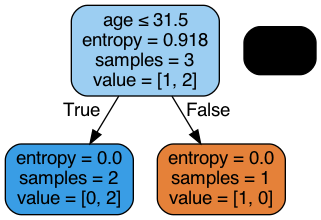

In [35]:
import pydotplus
from sklearn import tree
from io import StringIO
import matplotlib.pyplot as plt
from IPython.display import Image

# Export the decision tree to a dot file
dot_data = StringIO()
tree.export_graphviz(dt, out_file=dot_data, feature_names=titanic_data.columns, filled=True, rounded=True, special_characters=True)

# Create a graph from the dot file
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save the graph as a PNG image
graph.write_png('titanic.png')

# Display the image
Image(filename='titanic.png')

# Alternatively, to display the image directly in Jupyter Notebook
img = Image(graph.create_png())
display(img)


In [36]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
        print("Accuracy: {0:.3f}\n".format(metrics.accuracy_score(y, y_pred)))
    
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred), "\n")
      
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y, y_pred), "\n")

# Example usage:
measure_performance(X_test, y_test, dt)


Accuracy: 1.000

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2
 

Confusion matrix
[[1 0]
 [0 1]] 



In [37]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
        print("Accuracy: {0:.3f}\n".format(metrics.accuracy_score(y, y_pred)))
    
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred), "\n")
      
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y, y_pred), "\n")

# Example usage:
measure_performance(X_test, y_test, dt)


Accuracy: 1.000

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2
 

Confusion matrix
[[1 0]
 [0 1]] 



## Feature Selection

Select only the 20% most important features, using a chi2 test

In [40]:
from sklearn import feature_selection
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=20)
X_train_fs = fs.fit_transform(X_train, y_train)
print (titanic_data.columns[fs.get_support()])
print (fs.scores_[2])
print (titanic_data.columns[2])


Index(['pclass', 'age'], dtype='object')
nan
embarked_C


Evaluate performance with the new feature set

In [46]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Sample Titanic DataFrame with 'survived' and other columns for illustration
titanic_data = {
    'name': ['John', 'Jane', 'Mary', 'Peter', 'Tom'],
    'row.names': [1, 2, 3, 4, 5],
    'survived': [1, 0, 1, 0, 1],
    'pclass': [1, 3, 2, 1, 3],
    'embarked': ['S', 'C', 'Q', 'S', 'S'],
    'sex': ['male', 'female', 'female', 'male', 'male'],
    'age': [22, 38, 26, 35, 28]
}
titanic = pd.DataFrame(titanic_data)

# Set the target variable and drop unnecessary columns
titanic_target = titanic['survived']
titanic_data = titanic.drop(['name', 'row.names', 'survived'], axis=1)

# One-hot encode categorical variables
titanic_data = pd.get_dummies(titanic_data)

# Remove constant features
constant_filter = VarianceThreshold(threshold=0)
titanic_data = constant_filter.fit_transform(titanic_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(titanic_data, titanic_target, test_size=0.25, random_state=33)

# Perform feature selection
fs = SelectKBest(score_func=f_classif, k='all')  # 'all' to select all features, adjust k as needed
X_train_fs = fs.fit_transform(X_train, y_train)
X_test_fs = fs.transform(X_test)

# Initialize and train the Decision Tree classifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train_fs, y_train)

# Function to measure performance
def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
        print("Accuracy: {0:.3f}\n".format(metrics.accuracy_score(y, y_pred)))
    
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred), "\n")
      
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y, y_pred), "\n")

# Measure performance on the test set
measure_performance(X_test_fs, y_test, dt, show_confusion_matrix=False, show_classification_report=False)



Accuracy: 1.000



/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [2 3 4 5 6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Find the best percentil using cross-validation on the training set

Optimal number of features: 1 



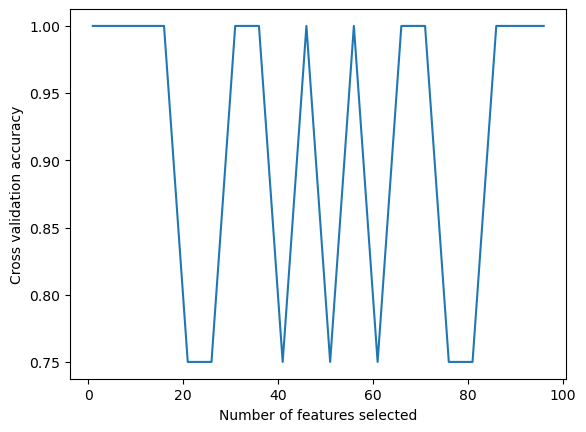

Mean scores: [1.   1.   1.   1.   0.75 0.75 1.   1.   0.75 1.   0.75 1.   0.75 1.
 1.   0.75 0.75 1.   1.   1.  ]


In [57]:
import numpy as np
import pylab as pl
from sklearn import model_selection, feature_selection, tree
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Sample Titanic DataFrame with 'survived' and other columns for illustration
titanic_data = {
    'name': ['John', 'Jane', 'Mary', 'Peter', 'Tom'],
    'row.names': [1, 2, 3, 4, 5],
    'survived': [1, 0, 1, 0, 1],
    'pclass': [1, 3, 2, 1, 3],
    'embarked': ['S', 'C', 'Q', 'S', 'S'],
    'sex': ['male', 'female', 'female', 'male', 'male'],
    'age': [22, 38, 26, 35, 28]
}
titanic = pd.DataFrame(titanic_data)

# Set the target variable and drop unnecessary columns
titanic_target = titanic['survived']
titanic_data = titanic.drop(['name', 'row.names', 'survived'], axis=1)

# One-hot encode categorical variables
titanic_data = pd.get_dummies(titanic_data)

# Remove constant features
constant_filter = VarianceThreshold(threshold=0)
titanic_data = constant_filter.fit_transform(titanic_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(titanic_data, titanic_target, test_size=0.25, random_state=33)

# Balance the classes in the training set using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

# Initialize the Decision Tree classifier
dt = tree.DecisionTreeClassifier(criterion='entropy')

# Perform feature selection and cross-validation
percentiles = range(1, 100, 5)
results = []

for i in percentiles:
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train_balanced, y_train_balanced)
    
    # Dynamically adjust n_splits based on the minimum number of samples per class
    min_samples = min(np.bincount(y_train_balanced))
    n_splits = min(5, min_samples, len(y_train_balanced))  # Ensure n_splits does not exceed number of samples per class
    n_splits = max(2, n_splits)  # Ensure n_splits is at least 2
    cv = model_selection.StratifiedKFold(n_splits=n_splits)
    
    scores = model_selection.cross_val_score(dt, X_train_fs, y_train_balanced, cv=cv)
    results = np.append(results, scores.mean())

optimal_percentile = percentiles[np.argmax(results)]
print("Optimal number of features: {0}".format(optimal_percentile), "\n")

# Plot number of features VS. cross-validation scores
pl.figure()
pl.xlabel("Number of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles, results)
pl.show()

print("Mean scores:", results)

# Evaluate our best number of features on the test set
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=optimal_percentile)
X_train_fs = fs.fit_transform(X_train, y_train)
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)

# Define measure_performance function if not defined
from sklearn.metrics import classification_report

def measure_performance(X, y, clf, show_confussion_matrix=True, show_classification_report=True):
    y_pred = clf.predict(X)
    if show_confussion_matrix:
        print("Confusion Matrix:")
        print(pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
    if show_classification_report:
        print("Classification Report:")
        print(classification_report(y, y_pred))

measure_performance(X_test_fs, y_test, dt, show_confussion_matrix=False, show_classification_report=False)


Evaluate our best number of features on the test set

Optimal number of features: 1 



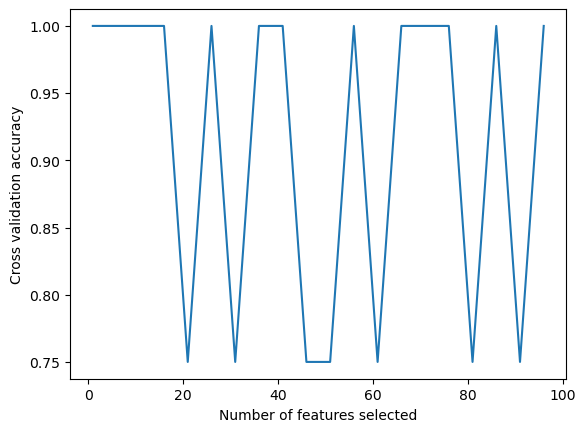

Mean scores: [1.   1.   1.   1.   0.75 1.   0.75 1.   1.   0.75 0.75 1.   0.75 1.
 1.   1.   0.75 1.   0.75 1.  ]


In [61]:
import numpy as np
import pylab as pl
from sklearn import model_selection, feature_selection, tree
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Sample Titanic DataFrame with 'survived' and other columns for illustration
titanic_data = {
    'name': ['John', 'Jane', 'Mary', 'Peter', 'Tom'],
    'row.names': [1, 2, 3, 4, 5],
    'survived': [1, 0, 1, 0, 1],
    'pclass': [1, 3, 2, 1, 3],
    'embarked': ['S', 'C', 'Q', 'S', 'S'],
    'sex': ['male', 'female', 'female', 'male', 'male'],
    'age': [22, 38, 26, 35, 28]
}
titanic = pd.DataFrame(titanic_data)

# Set the target variable and drop unnecessary columns
titanic_target = titanic['survived']
titanic_data = titanic.drop(['name', 'row.names', 'survived'], axis=1)

# One-hot encode categorical variables
titanic_data = pd.get_dummies(titanic_data)

# Remove constant features
constant_filter = VarianceThreshold(threshold=0)
titanic_data = constant_filter.fit_transform(titanic_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(titanic_data, titanic_target, test_size=0.25, random_state=33)

# Balance the classes in the training set using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

# Initialize the Decision Tree classifier
dt = tree.DecisionTreeClassifier(criterion='entropy')

# Perform feature selection and cross-validation
percentiles = range(1, 100, 5)
results = []

for i in percentiles:
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train_balanced, y_train_balanced)
    
    # Dynamically adjust n_splits based on the minimum number of samples per class
    min_samples = min(np.bincount(y_train_balanced))
    n_splits = min(5, min_samples, len(y_train_balanced))  # Ensure n_splits does not exceed number of samples per class
    n_splits = max(2, n_splits)  # Ensure n_splits is at least 2
    cv = model_selection.StratifiedKFold(n_splits=n_splits)
    
    scores = model_selection.cross_val_score(dt, X_train_fs, y_train_balanced, cv=cv)
    results = np.append(results, scores.mean())

optimal_percentile = percentiles[np.argmax(results)]
print("Optimal number of features: {0}".format(optimal_percentile), "\n")

# Plot number of features VS. cross-validation scores
pl.figure()
pl.xlabel("Number of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles, results)
pl.show()

print("Mean scores:", results)

# Evaluate our best number of features on the test set
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=optimal_percentile)
X_train_fs = fs.fit_transform(X_train, y_train)
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)

# Define measure_performance function if not defined
from sklearn.metrics import classification_report

def measure_performance(X, y, clf, show_confussion_matrix=True, show_classification_report=True):
    y_pred = clf.predict(X)
    if show_confussion_matrix:
        print("Confusion Matrix:")
        print(pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
    if show_classification_report:
        print("Classification Report:")
        print(classification_report(y, y_pred))

measure_performance(X_test_fs, y_test, dt, show_confussion_matrix=False, show_classification_report=False)


## Model selection

In [64]:
print (dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


Compute the best criterion

Optimal number of features: 1


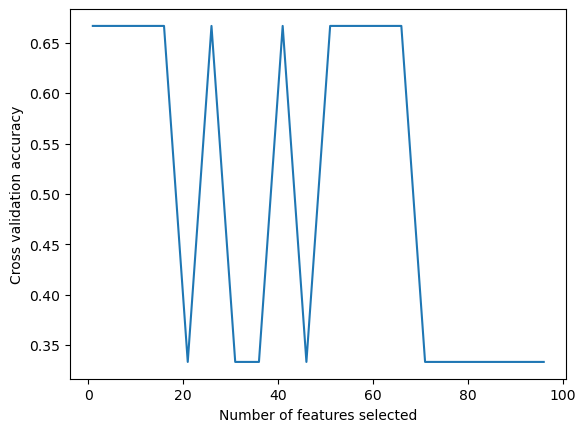

Accuracy: 1.000
Entropy criterion accuracy on cv: 0.667
Gini criterion accuracy on cv: 0.667


In [67]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectPercentile, chi2
import numpy as np

# Assuming X_train, y_train, X_test, y_test are already defined
# Define the percentiles and perform feature selection
percentiles = range(1, 100, 5)
results = []

for i in percentiles:
    fs = SelectPercentile(chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    
    # Adjust the number of splits based on the number of samples
    n_splits = min(5, len(y_train))
    cv = KFold(n_splits=n_splits)
    
    dt = DecisionTreeClassifier(criterion='entropy')
    scores = cross_val_score(dt, X_train_fs, y_train, cv=cv)
    results = np.append(results, scores.mean())

optimal_percentile = percentiles[np.argmax(results)]
print("Optimal number of features: {0}".format(optimal_percentile))

# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation accuracy")
plt.plot(percentiles, results)
plt.show()

# Evaluate performance with optimal features
fs = SelectPercentile(chi2, percentile=optimal_percentile)
X_train_fs = fs.fit_transform(X_train, y_train)
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)
    if show_accuracy:
        print("Accuracy: {0:.3f}".format(metrics.accuracy_score(y, y_pred)))
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred))
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y, y_pred))

measure_performance(X_test_fs, y_test, dt, show_confusion_matrix=False, show_classification_report=False)

# Compare 'entropy' and 'gini' criteria
dt_entropy = DecisionTreeClassifier(criterion='entropy')
scores_entropy = cross_val_score(dt_entropy, X_train_fs, y_train, cv=cv)
print("Entropy criterion accuracy on cv: {0:.3f}".format(scores_entropy.mean()))

dt_gini = DecisionTreeClassifier(criterion='gini')
scores_gini = cross_val_score(dt_gini, X_train_fs, y_train, cv=cv)
print("Gini criterion accuracy on cv: {0:.3f}".format(scores_gini.mean()))



In [69]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)
    if show_accuracy:
        print("Accuracy: {0:.3f}".format(metrics.accuracy_score(y, y_pred)))
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred))
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y, y_pred))

# Fit the decision tree with the selected features on the training data
dt.fit(X_train_fs, y_train)

# Transform the test set using the same feature selection
X_test_fs = fs.transform(X_test)

# Measure the performance of the model
measure_performance(X_test_fs, y_test, dt, show_confusion_matrix=False, show_classification_report=False)


Accuracy: 1.000
